# Fichier de visualisation des fonction de cout pour le jeu virus/antivirus avec nombre cumulé d'infectés

## Imports

In [140]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

## Récupération des données

In [141]:
df_u = pd.read_csv('res_simu/cost_little_graph_unicast_virus2.csv')
df_b = pd.read_csv('res_simu/cost_little_graph_broadcast_virus2.csv')
df_c = pd.read_csv('res_simu/cost_little_graph_unicast_crazy_virus.csv')
df_s = pd.read_csv('res_simu/cost_little_graph_unicast_sneaky_virus.csv')

In [142]:
## unicast

k_tab_u = df_u['K'].to_numpy()
ep_tab_u = df_u['epidemic peak'].to_numpy()
df_u['nombre infectes'] = df_u['nombre infectes'].apply(ast.literal_eval)
inf_tab_u = df_u['nombre infectes'].to_numpy()
cost_tab_u = df_u['cost fun'].to_numpy()
delta_tab_u = df_u['delta fun'].to_numpy()

## broadcast

k_tab_b = df_b['K'].to_numpy()
ep_tab_b = df_b['epidemic peak'].to_numpy()
df_b['nombre infectes'] = df_b['nombre infectes'].apply(ast.literal_eval)
inf_tab_b = df_b['nombre infectes'].to_numpy()
cost_tab_b = df_b['cost fun'].to_numpy()
delta_tab_b = df_b['delta fun'].to_numpy()

## crazy

k_tab_c = df_c['K'].to_numpy()
ep_tab_c = df_c['epidemic peak'].to_numpy()
df_c['nombre infectes'] = df_c['nombre infectes'].apply(ast.literal_eval)
inf_tab_c = df_c['nombre infectes'].to_numpy()
cost_tab_c = df_c['cost fun'].to_numpy()
delta_tab_c = df_c['delta fun'].to_numpy()

## sneaky

k_tab_s = df_s['K'].to_numpy()
ep_tab_s = df_s['epidemic peak'].to_numpy()
df_s['nombre infectes'] = df_s['nombre infectes'].apply(ast.literal_eval)
inf_tab_s = df_s['nombre infectes'].to_numpy()
cost_tab_s = df_s['cost fun'].to_numpy()
delta_tab_s = df_s['delta fun'].to_numpy()

## Construction du coût du virus

In [143]:
gain_virus_u = [] # unicast
gain_virus_b = [] # broadcast
gain_virus_c = [] # crazy
gain_virus_s = [] # sneaky
tol = 0.9
nb_simu = 30


## unicast

for i in range(len(inf_tab_u)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_u[i][j])
        gain_moyen += np.sum(t)
    gain_moyen = gain_moyen/nb_simu
    gain_virus_u.append(gain_moyen)


## broadcast

for i in range(len(inf_tab_b)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_b[i][j])
        gain_moyen += np.sum(t)
    gain_moyen = gain_moyen/nb_simu
    gain_virus_b.append(gain_moyen)


## crazy

for i in range(len(inf_tab_c)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_c[i][j])
        gain_moyen += np.sum(t)
    gain_moyen = gain_moyen/nb_simu
    gain_virus_c.append(gain_moyen)


## sneaky

for i in range(len(inf_tab_s)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab_s[i][j])
        gain_moyen += np.sum(t)
    gain_moyen = gain_moyen/nb_simu
    gain_virus_s.append(gain_moyen)


In [159]:
l_dom = [i for i in range(len(gain_virus_b)) if gain_virus_s[i]>=gain_virus_b[i]]
print(l_dom)

24

## Construction coût antivirus (remplacement du pic épidémique par le nombre cumulé d'infectés)

In [145]:
# alpha = 1/2300 
alpha = 1/220
beta = 0

gain_anti_u = alpha*np.array(gain_virus_u)+beta*k_tab_u*1000/951
gain_anti_b = alpha*np.array(gain_virus_b)+beta*k_tab_b*1000/951
gain_anti_c = alpha*np.array(gain_virus_c)+beta*k_tab_c*1000/951
gain_anti_s = alpha*np.array(gain_virus_s)+beta*k_tab_s*1000/951

## Construction de la matrice de gains

In [146]:
res_uni = []
res_broad = []
res_crazy = []
res_sneaky = []

for j in range(5, len(gain_virus_b), 5): 
    res_uni.append((gain_virus_u[j], gain_anti_u[j]))
    res_broad.append((gain_virus_b[j],  gain_anti_b[j]))
    res_crazy.append((gain_virus_c[j],  gain_anti_c[j]))
    res_sneaky.append((gain_virus_s[j],  gain_anti_s[j]))
    
gains = [res_uni, res_broad, res_crazy, res_sneaky]

In [147]:
print(np.array(gains))

[[[4.49105667e+04 2.04138939e+02]
  [2.63266333e+04 1.19666515e+02]
  [1.94243000e+04 8.82922727e+01]
  [1.68750333e+04 7.67046970e+01]
  [1.56420333e+04 7.11001515e+01]
  [1.33165000e+04 6.05295455e+01]
  [1.36168333e+04 6.18946970e+01]
  [1.32607000e+04 6.02759091e+01]
  [1.27466000e+04 5.79390909e+01]
  [1.19717000e+04 5.44168182e+01]
  [1.11772000e+04 5.08054545e+01]
  [1.16565667e+04 5.29843939e+01]
  [1.10311667e+04 5.01416667e+01]
  [1.02730333e+04 4.66956061e+01]
  [1.03435667e+04 4.70162121e+01]
  [1.02617667e+04 4.66443939e+01]
  [1.06090000e+04 4.82227273e+01]
  [1.03071000e+04 4.68504545e+01]
  [1.10916333e+04 5.04165152e+01]
  [1.02189333e+04 4.64496970e+01]
  [1.03350333e+04 4.69774242e+01]
  [9.29536667e+03 4.22516667e+01]
  [9.96440000e+03 4.52927273e+01]
  [9.79306667e+03 4.45139394e+01]
  [1.06498667e+04 4.84084848e+01]
  [9.76493333e+03 4.43860606e+01]
  [9.80296667e+03 4.45589394e+01]
  [1.04015667e+04 4.72798485e+01]
  [9.67056667e+03 4.39571212e+01]
  [1.01014667e

## Affichage

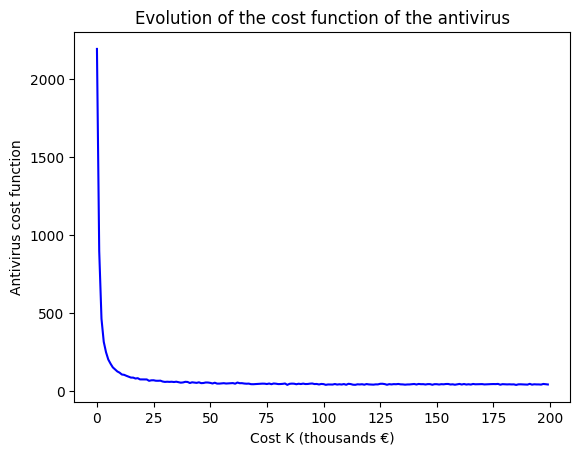

In [148]:
plt.plot(k_tab_u, gain_anti_u, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("unicast_antivirus.png")
plt.show()

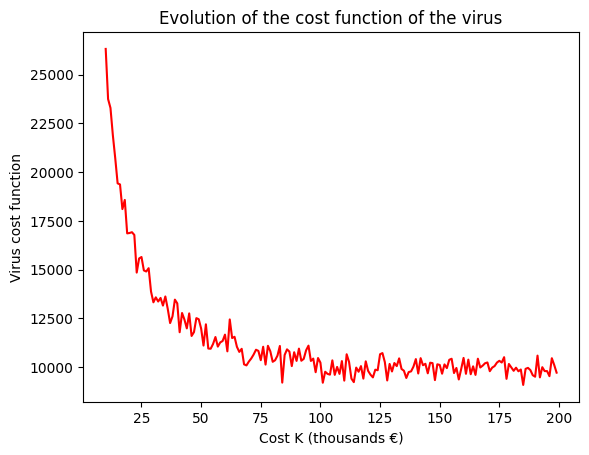

In [149]:
plt.plot(k_tab_u[10:], gain_virus_u[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("unicast_virus.png")
plt.show()

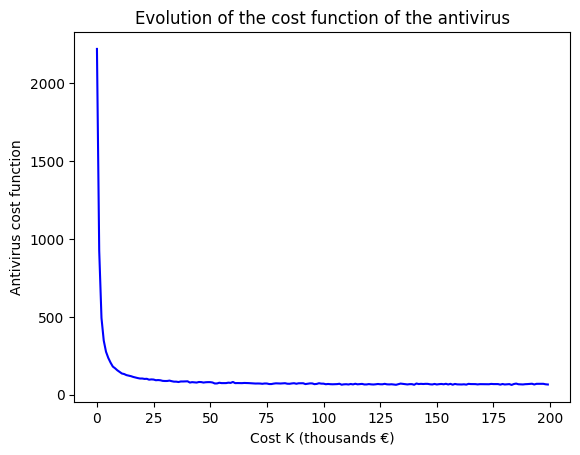

In [150]:
plt.plot(k_tab_b, gain_anti_b, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("broadcast_antivirus.png")
plt.show()

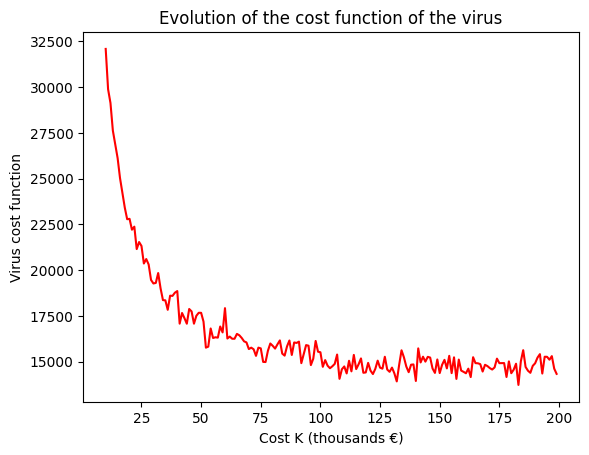

In [151]:
plt.plot(k_tab_b[10:], gain_virus_b[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("broadcast_virus.png")
plt.show()

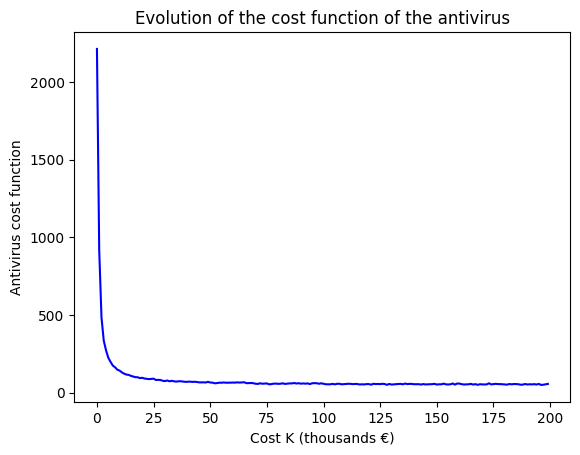

In [152]:
plt.plot(k_tab_c, gain_anti_c, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("crazy_antivirus.png")
plt.show()

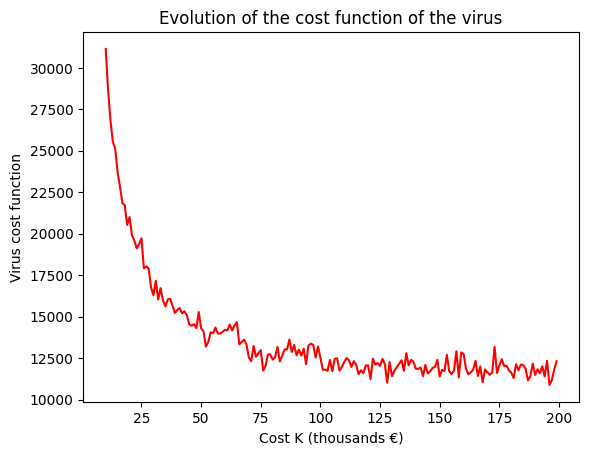

In [153]:
plt.plot(k_tab_c[10:], gain_virus_c[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("crazy_virus.png")
plt.show()

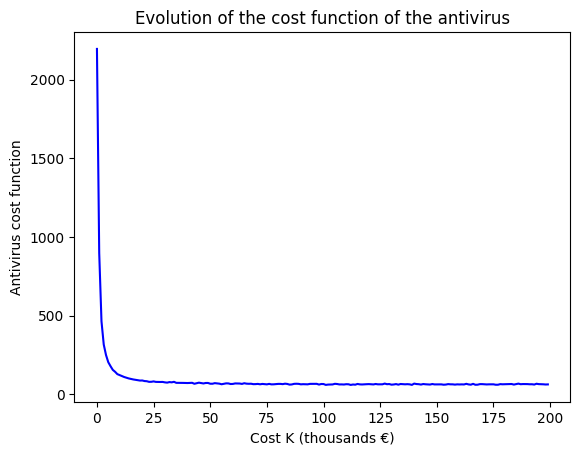

In [154]:
plt.plot(k_tab_s, gain_anti_s, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("sneaky_antivirus.png")
plt.show()

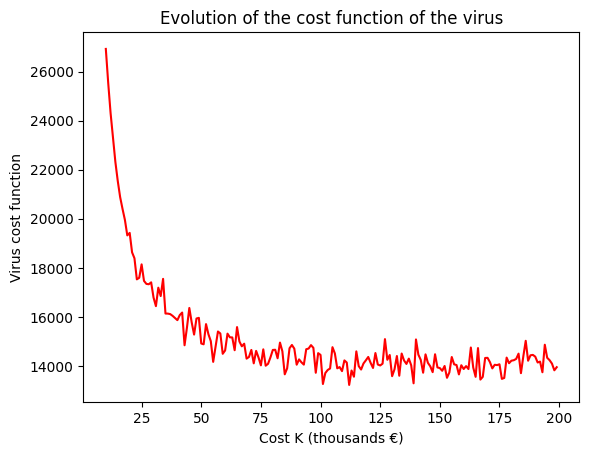

In [155]:
plt.plot(k_tab_s[10:], gain_virus_s[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("sneaky_virus.png")
plt.show()